# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [2]:
#Package Import
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')
%run functions.py

c:\Users\yqing\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Question 1: We choose 3 indexes, VOO (SP500), DIA(Dow), and QQQ(Nasqad). We shall test for a long period of time, e.g. 10 years. 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


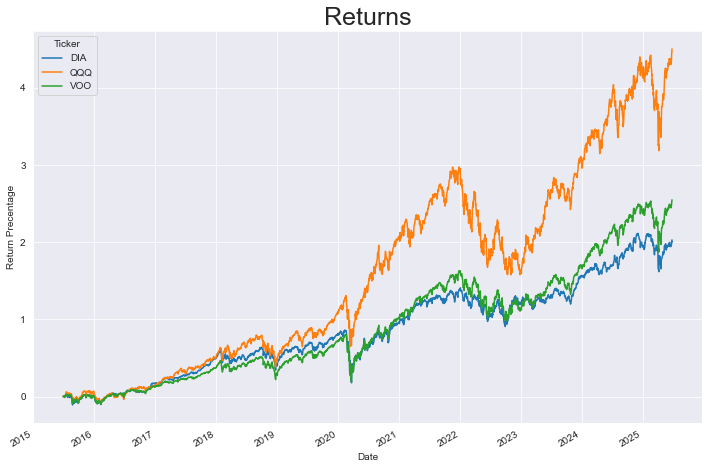

In [3]:
tickers = ['VOO', 'DIA', 'QQQ']

start_date = dt.datetime.today()-dt.timedelta(days = 10*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

#normalize the return first when plotting 
close = stock['Close']
normalized_returns = close/close.iloc[0]-1 #Moves stock prices to a start of 0
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

#Plot Cumlative Returns together
stock = pd.concat([stock, normalized_returns], axis =1 )
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 25)
plt.ylabel('Return Precentage')
plt.show()

In [6]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()




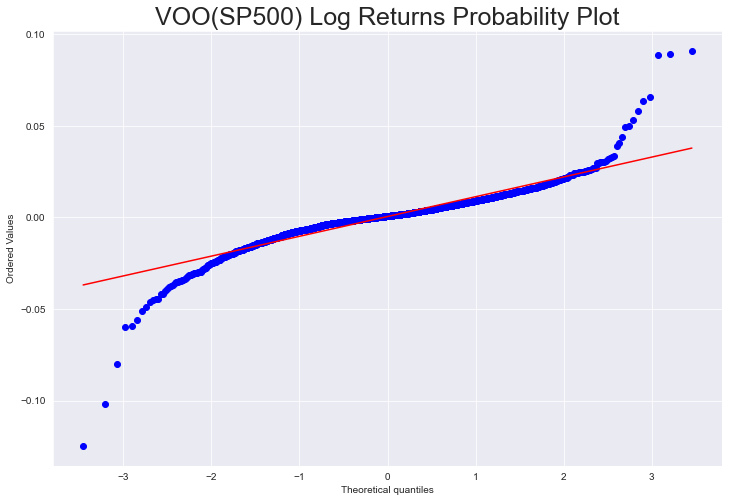

NormaltestResult(statistic=707.3568302284855, pvalue=2.5085106408240347e-154)

In [7]:
voo_daily_returns = daily_returns['VOO']
plt.figure(figsize=(12, 8))
stats.probplot(voo_daily_returns, dist="norm", plot=plt)
plt.title("VOO(SP500) Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(voo_daily_returns)


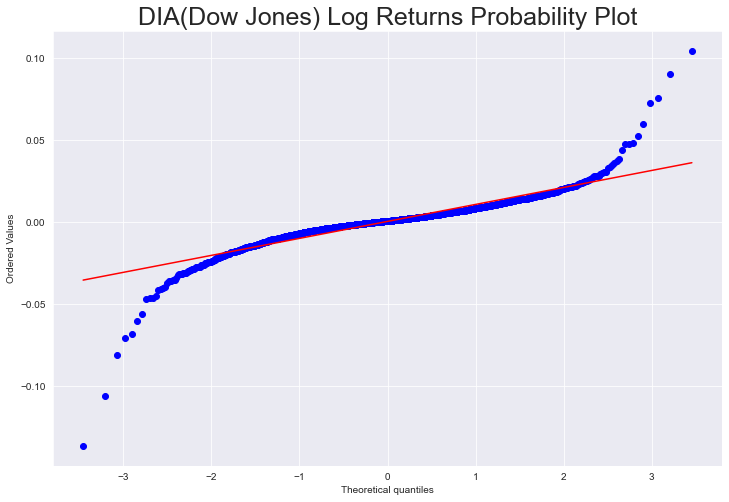

NormaltestResult(statistic=887.4504321938192, pvalue=1.961494830029761e-193)

In [8]:
dia_daily_returns = daily_returns['DIA']
plt.figure(figsize=(12, 8))
stats.probplot(dia_daily_returns, dist="norm", plot=plt)
plt.title("DIA(Dow Jones) Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(dia_daily_returns)

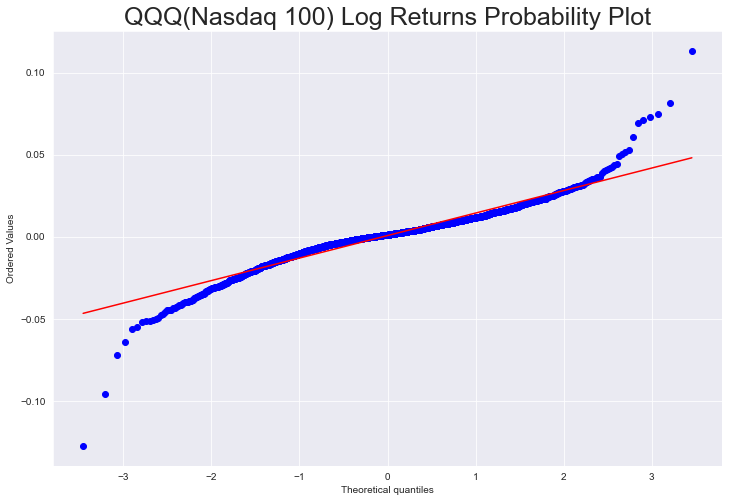

NormaltestResult(statistic=435.8462759885209, pvalue=2.276059914007269e-95)

In [9]:
qqq_daily_returns = daily_returns['QQQ']
plt.figure(figsize=(12, 8))
stats.probplot(qqq_daily_returns, dist="norm", plot=plt)
plt.title("QQQ(Nasdaq 100) Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(qqq_daily_returns)

From the probability plot and the p-value for all 3 indexes, it is apparant that we have statistically significant evidence to reject the normal distribution null hypothesis for log daily returns over the period of 10 years.

Nevertheless, we could try to shrink the time window and see whether the log return of indexes display normal distribuation over a shorter period of time. We pick the time window be year 2023 in this case.

[*********************100%***********************]  3 of 3 completed


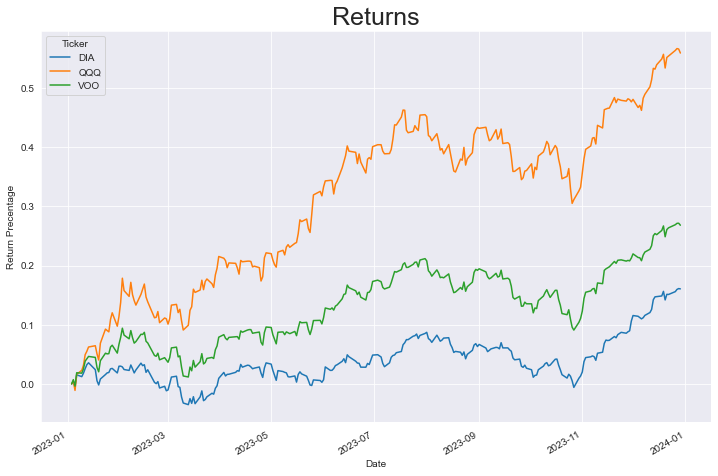

In [88]:
tickers = ['VOO', 'DIA', 'QQQ']

start_date = '2023-01-01'
end_date = '2023-12-31'

stock = yf.download(tickers, start = start_date, end = end_date)

#normalize the return first when plotting 
close = stock['Close']
normalized_returns = close/close.iloc[0]-1 #Moves stock prices to a start of 0
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

#Plot Cumlative Returns together
stock = pd.concat([stock, normalized_returns], axis =1 )
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 25)
plt.ylabel('Return Precentage')
plt.show()

daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

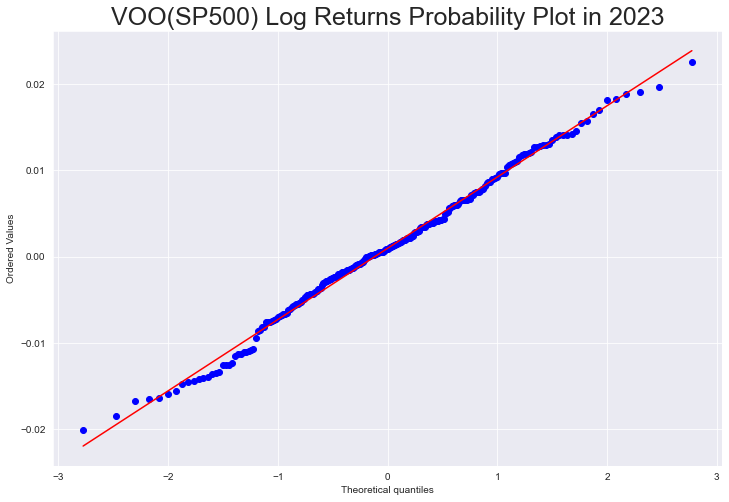

NormaltestResult(statistic=0.4356877926321605, pvalue=0.8042509784084564)

In [89]:
voo_daily_returns = daily_returns['VOO']
plt.figure(figsize=(12, 8))
stats.probplot(voo_daily_returns, dist="norm", plot=plt)
plt.title("VOO(SP500) Log Returns Probability Plot in 2023", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(voo_daily_returns)

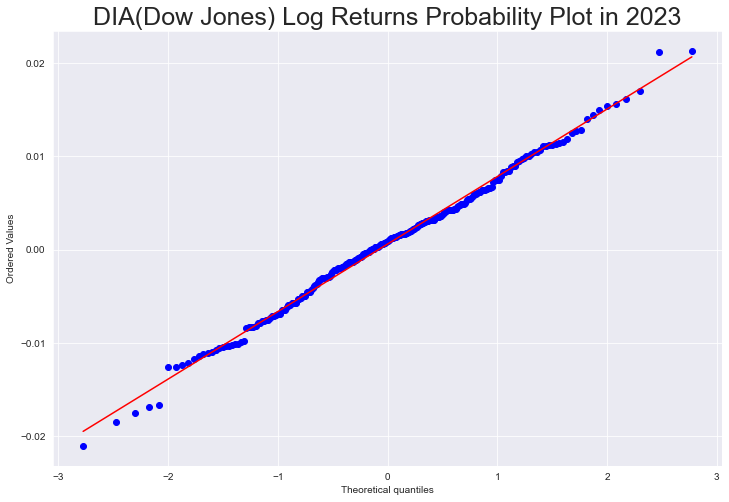

NormaltestResult(statistic=0.8119259459930965, pvalue=0.6663348393505164)

In [90]:
dia_daily_returns = daily_returns['DIA']
plt.figure(figsize=(12, 8))
stats.probplot(dia_daily_returns, dist="norm", plot=plt)
plt.title("DIA(Dow Jones) Log Returns Probability Plot in 2023", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(dia_daily_returns)

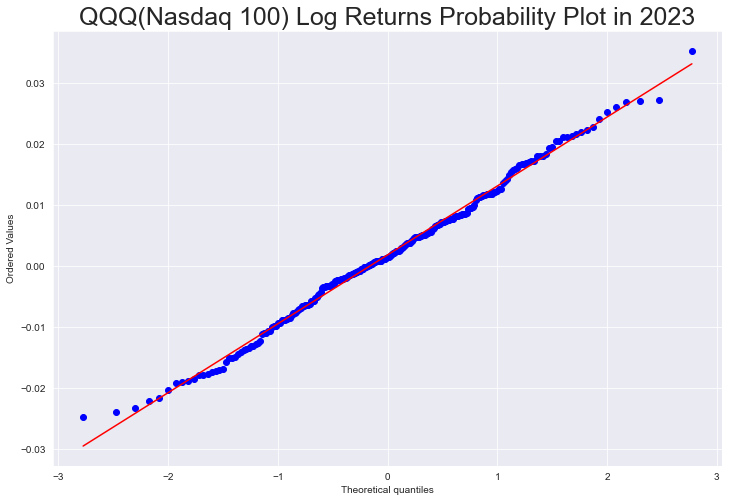

NormaltestResult(statistic=0.26128146884665354, pvalue=0.877532985159427)

In [91]:
qqq_daily_returns = daily_returns['QQQ']
plt.figure(figsize=(12, 8))
stats.probplot(qqq_daily_returns, dist="norm", plot=plt)
plt.title("QQQ(Nasdaq 100) Log Returns Probability Plot in 2023", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(qqq_daily_returns)

Remarkably, when we limit the time window to year 2023 only, we can nolonger reject the hypohesis that the log return of all 3 indexes are nnormally distribuated. Suggesting that it is possible the normal distribution assumption could work in a shorter time frame or in a period without major turbulence. 

Question 2: Surely, we could try to remove extreme values of the data from the 10 year period, which we defined as those having absoluate value greater than 0.03 (it is easy to understand as 3 percent daily change for a stock or index is rather significant).

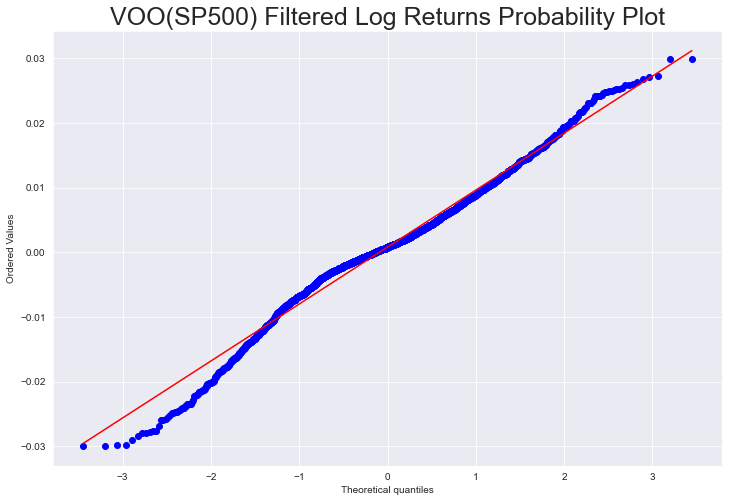

NormaltestResult(statistic=67.685537996558, pvalue=2.005728620784694e-15)

In [10]:
voo_daily_returns_filtered = voo_daily_returns[voo_daily_returns.abs() <= 0.03]
plt.figure(figsize=(12, 8))
stats.probplot(voo_daily_returns_filtered, dist="norm", plot=plt)
plt.title("VOO(SP500) Filtered Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(voo_daily_returns_filtered)


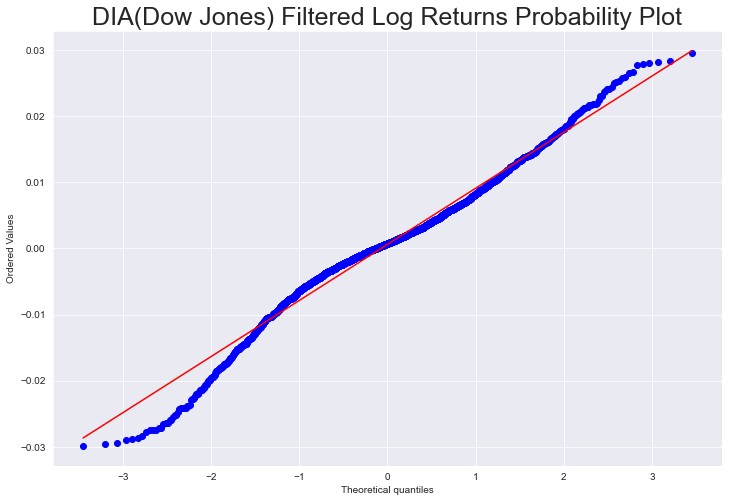

NormaltestResult(statistic=89.21296365668917, pvalue=4.2427855867540815e-20)

In [11]:
dia_daily_returns_filtered = dia_daily_returns[dia_daily_returns.abs() <= 0.03]
plt.figure(figsize=(12, 8))
stats.probplot(dia_daily_returns_filtered, dist="norm", plot=plt)
plt.title("DIA(Dow Jones) Filtered Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(dia_daily_returns_filtered)


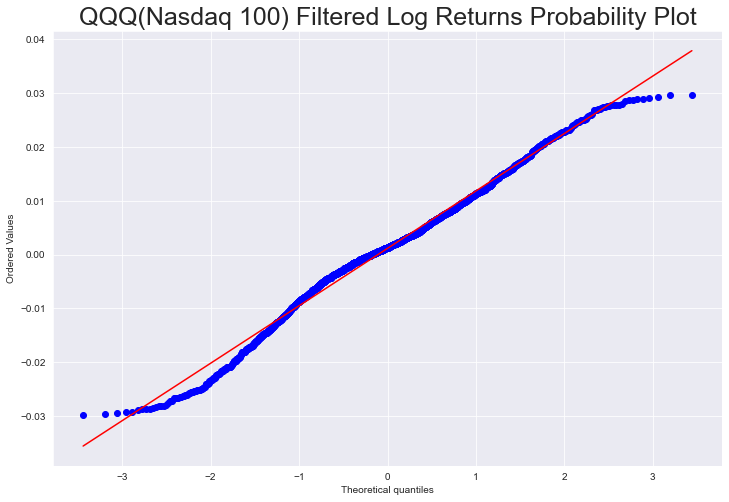

NormaltestResult(statistic=23.647443524224734, pvalue=7.328631469828018e-06)

In [12]:
qqq_daily_returns_filtered = qqq_daily_returns[qqq_daily_returns.abs() <= 0.03]
plt.figure(figsize=(12, 8))
stats.probplot(qqq_daily_returns_filtered, dist="norm", plot=plt)
plt.title("QQQ(Nasdaq 100) Filtered Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(qqq_daily_returns_filtered)


Therefore, for the 10 year daily log return data, even after removing extreme values of daily log return, it is still statistically significant that the distribution is not normal. Thus, the non-normalness of the log return data over the 10 year period might not be solely caused by the extremev values in return data.  

Question 3: Based on our answer of question 1, it is clear that such a portofolio can be constructed for year 2023 with any arbitrary weight distributions between the 3 selected indexes. 

Question 4: We could examine the higer risk portfolio constructed in project 1. Where the weight distribution is 0.35 in VOO, 0.35 in BTCO, and 0.3 in SHLD. We could test it over the last 12 months.

[*********************100%***********************]  3 of 3 completed


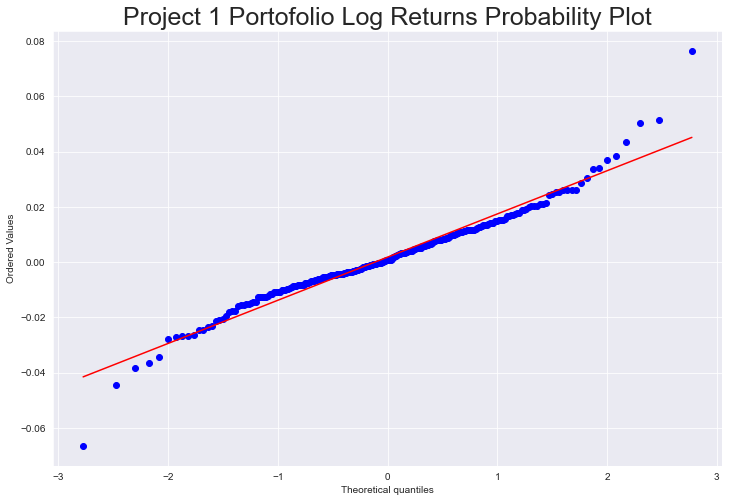

NormaltestResult(statistic=26.7055283631525, pvalue=1.588430427861431e-06)

In [95]:
tickers = [ 'VOO','BTCO','SHLD']

start_date_2 = '2024-06-24'
end_date_2 = '2025-06-24'

stock = yf.download(tickers, start = start_date_2, end = end_date_2)

weights = [0.35, 0.35, 0.3]

close = stock['Close']

daily_ret = close.pct_change().dropna()
port_daily = daily_ret.dot(weights)
daily_returns = np.log(port_daily + 1)
daily_returns = daily_returns.dropna()

plt.figure(figsize=(12, 8))
stats.probplot(daily_returns, dist="norm", plot=plt)
plt.title("Project 1 Portofolio Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(daily_returns)

Unforunately, over the past 12 months the log returen of our portofolio doesn't appear to be normally distribuated based on p-value. We could try to test the same portofolio over a different time window, for example, the six months before the US presidential election.

[*********************100%***********************]  3 of 3 completed


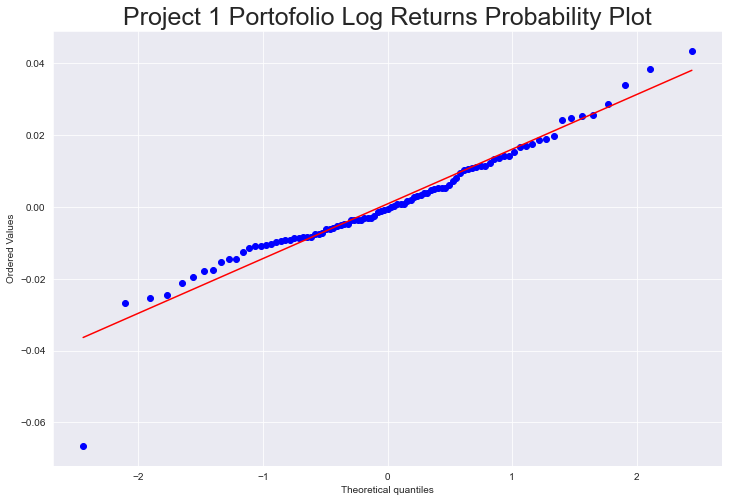

NormaltestResult(statistic=14.621392959999218, pvalue=0.0006683513965503188)

In [96]:
tickers = [ 'VOO','BTCO','SHLD']

start_date_2 = '2024-05-01'
end_date_2 = '2024-11-01'

stock = yf.download(tickers, start = start_date_2, end = end_date_2)

weights = [0.35, 0.35, 0.3]

close = stock['Close']

daily_ret = close.pct_change().dropna()
port_daily = daily_ret.dot(weights)
daily_returns = np.log(port_daily + 1)
daily_returns = daily_returns.dropna()

plt.figure(figsize=(12, 8))
stats.probplot(daily_returns, dist="norm", plot=plt)
plt.title("Project 1 Portofolio Log Returns Probability Plot", fontsize=25)
plt.grid(True)
plt.show()
stats.normaltest(daily_returns)

We observed that even for this shrinked time frame, the distribution of log return for this portfolio is still not normal. This discovery could possibily be explained by the composition of this portfolio which include both digitial assets and defense sector assets, which could display high volatility when opportunitities of spectulation appears and geopolitical tension rises. 